## module import 

In [40]:
import pandas as pd # 데이터 구성 패키지:Siries, DataFrame
import numpy as np # 행렬 연산 패키지
import matplotlib #데이터 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns #데이터 시각화(추세 등) 패키지
from sklearn.preprocessing import scale, minmax_scale, robust_scale #Scaling클래스

### Korean font setting

In [41]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'STIXSizeFourSym',
 'cmr10',
 'DejaVu Serif',
 'cmex10',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'STIXSizeTwoSym',
 'cmmi10',
 'STIXSizeFiveSym',
 'cmb10',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmtt10',
 'cmss10',
 'cmsy10',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif',
 'Liberation Sans',
 'Ubuntu',
 'Sarai',
 'padmaa',
 'padmaa',
 'NanumMyeongjo',
 'Ubuntu',
 'Noto Mono',
 'NanumGothic Eco',
 'FreeMono',
 'Lohit Malayalam',
 'KacstOne',
 'Ubuntu Condensed',
 'Lohit Odia',
 'Manjari',
 'Tlwg Typist',
 'NanumBarunGothic',
 'Saab',
 'NanumSquare',
 'Ubuntu',
 'aakar',
 'Lohit Kannada',
 'Ubuntu',
 'Norasi',

In [42]:
plt.rcParams['font.family']='NanumGothic'

# 1. 데이터 불러오기

In [43]:
df=pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/titanic.csv",engine='python',encoding='CP949')

# 데이터 분석 및 변수들의 결측, 이상치 처리

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.shape
# 데이터의 모양 891행 x 12열

(891, 12)

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2.목표변수 및 설명변수(범주형/연속형 변수별)의 분포 확인


#### 특징(열) 별 생존여부를 계속해서 불러와야하기 만든 함수 

In [48]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df_surv = pd.DataFrame([survived,dead])
    df_surv.index = ['Survived','Dead']
    df_surv.plot(kind='bar',stacked=True, figsize=(10,5))

#### 가설 1. 여성이 남성보다 생존률이 높을것이다.
#### 가설1 결론: 왼쪽 Bar 그래프의 파란색 부분을 보면 여성의 남성보다 생존률이 높은것을 볼 수 있다.

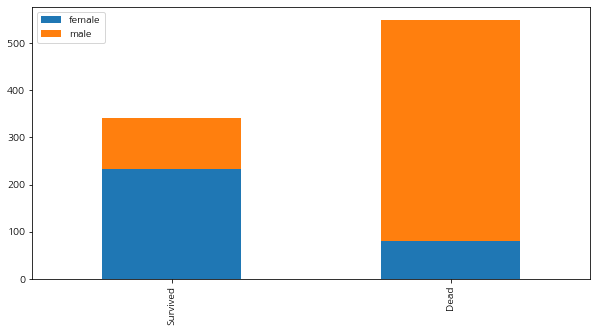

In [49]:
bar_chart('Sex')

In [50]:
df[df['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

#### 실제수치를 보면 여성이 남성의 2배이상 생존한 것을 볼 수 있다. 

#### 가설 2: 나이가 어릴수록 생존률이 높을것이다.

In [51]:
df['Age'].mean()
# 타이타닉호 전체의 평균나이

29.758888888888887

In [52]:
df['young_old']=0
# 나이가 30이상 이하로 구분하여 저장할 새로운 열 생성

In [53]:
df.loc[df['Age']<30,'young_old']='Y'
df.loc[df['Age']>=30,'young_old']='O'
#나이가 30이상이면 'O' 나이가 30미만이면 'Y'로 데이터들을 저장해주었다.

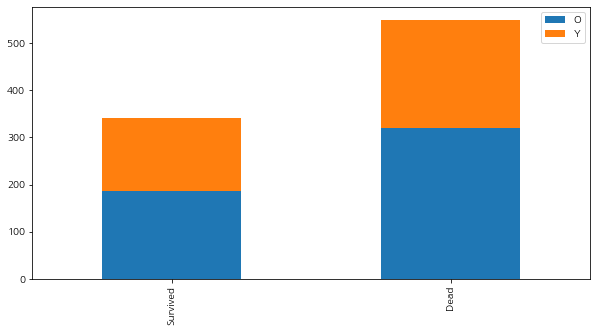

In [54]:
bar_chart('young_old')

In [55]:
df[df['Survived']==1]['young_old'].value_counts()
# 생존자중 30전후나이로 값을 세었다.

O    186
Y    156
Name: young_old, dtype: int64


#### 가설 2 결론: bar 차트로 확인해본 결과 O가 약간더 많은 것을 볼 수 있으나 30명의 차이로 나이가 어릴수록 생존률이 높다는 것은 거짓으로
#### 가설을 기각한다.

#### 가설 3 : 나이와 요금에 따라 생존 상관성이 있을까?

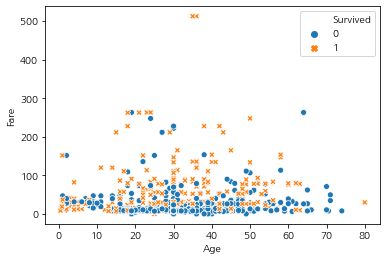

In [56]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',style='Survived',data=df)

#### 가설 3 결론 : 위 scatterplot 을 보면 알수 있듯이 노란색 즉 생존한 사람의 비용이 더 많은 것을 알수 있다. 따라서 가설3은 성립한다. 

#### 가설 4:P-class가 높을수록 생존률이 높을 것이다.

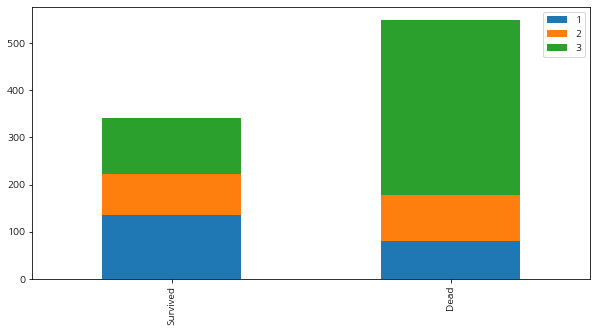

In [57]:
bar_chart('Pclass')

#### 가설4 결론: 1등석의 생존률이 제일 높지만 2등석의 생존률이 3등석의 생존률보다 낮기에 가설이 성립한다고 볼수 없다.  

#### 가설 4-1: P-class와 성별에 따라 차이가 있을까?

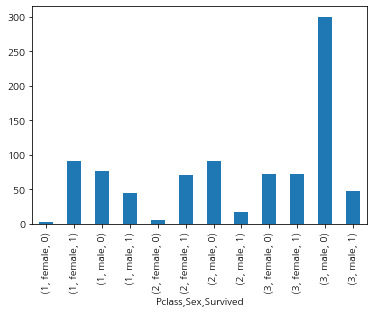

In [58]:
df_groupby_psex=df.groupby(['Pclass','Sex','Survived'],as_index=False).size()
df_groupby_psex.plot.bar()

#### 가설4-1 결론: 3등급의 남자의 사망률이 제일 압도적이고 나머지는 전체적으로 비슷하여 등급이 낮고 성별이 남자인 사람이 제일 많이 죽었다는 결론을 도출할 수 있다. 

#### 가설 5: 항구에 따라 생존률이 차이가 날 것이다.(지역별 경제수준 대문에 P-class의 차이가 있을 것이다.


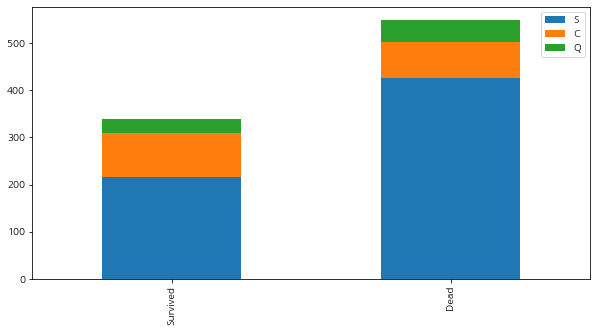

In [59]:
bar_chart('Embarked')

#### 가설 5 결론: S,Q는 생존률이 낮고 C는 생존률과 사망률이 비슷하여 항구에 따른 생존률 차이는 없다고 볼 수 있다.

#### 가설 6: P-class와 항구에 따른 생존률의 차이가 있을까?

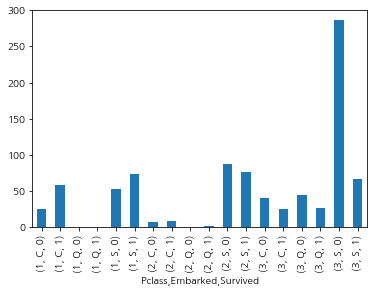

In [60]:
df_groupby_psex=df.groupby(['Pclass','Embarked','Survived'],as_index=False).size()
df_groupby_psex.plot.bar()

#### 가설 6 결론: 3등석 기준으로만 보았을 때 C,Q의 사망률은 비슷하지만 S는 압도적으로 높은 것을 보아 S지역이 C,Q보다 사망률이 높다는 결론을 도출 할 수 있다.

#### 가설 7: 가족이 있는지 없는지에 따라 생존률이 차이가 날 것이다.

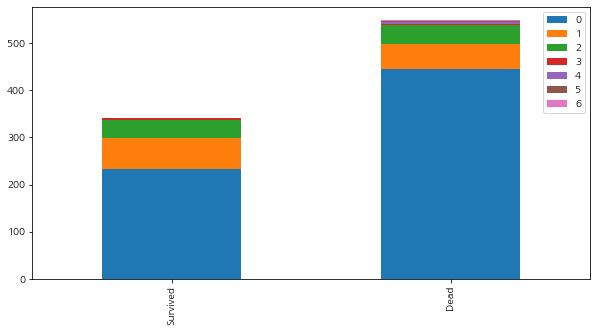

In [61]:
bar_chart('Parch')

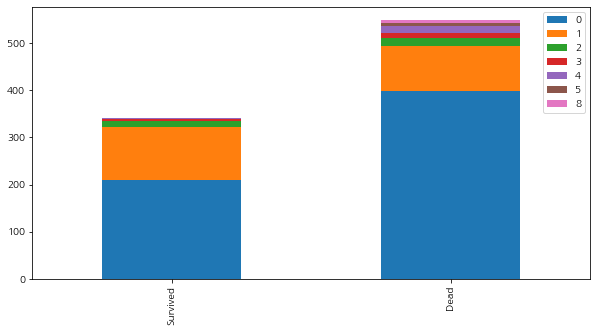

In [62]:
bar_chart('SibSp')

#### 가설7 결론: 함께 탑승한 형제,배우자가 없거나 함께 탑승한 자녀,부모가 없는 경우 압도적으로 사망률이 높았다. 따라서 가설이 맞다는 결론을 도출할 수 있다.

#### 가설 8: 가족이 많을수록 생존률에 차이가 있을까?

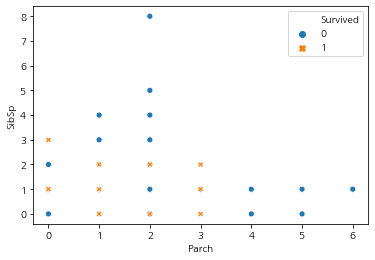

In [63]:
sns.scatterplot(x='Parch',y='SibSp',hue='Survived',style='Survived',data=df)

#### 가설 8 결론: 가족이 많을수록 사망률이 더 높다고 볼 수 있다. 따라서 가설 8은 차이가 있다고 결론을 도출 한다.

#### 가설 9: ticket은 고유 아이디이기에 생존률과 전혀 상관이 없을 것이다.

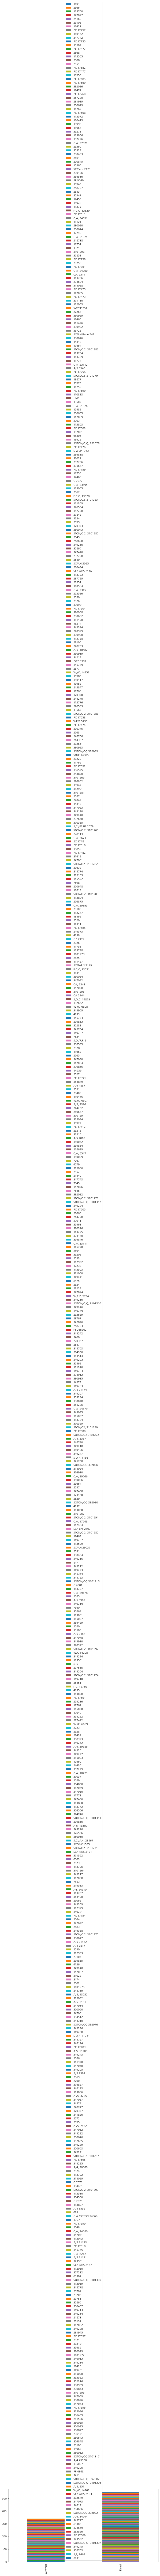

In [64]:
bar_chart('Ticket')

#### 가설9 결론: ticket의 고유아이디가 일정하면 문자열 Slice를 이용하여 가설검증을 해보려했으나 공통점이 없어서 가설9는 검증할 수 가 없다. 

# STEP3 변수들의 결측 및 이상치 처리

In [65]:
df.isnull().sum()
#Cabin(객실) 의 데이터 687개가 누락 되어있음을 알 수 있다.
#Embarked(선박장)의 데이터 2개가 누락 되어있음을 알 수 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
young_old        0
dtype: int64

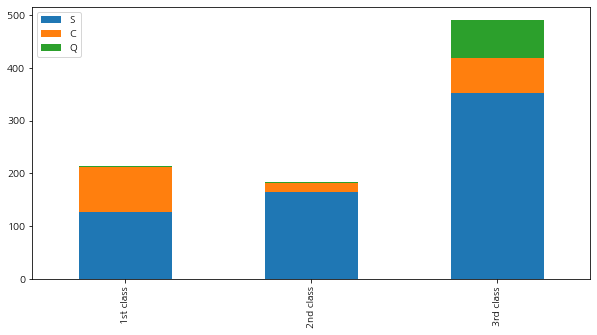

In [66]:
Pclass1 = df[df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass']==3]['Embarked'].value_counts()
df_class = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df_class.index = ['1st class','2nd class', '3rd class']
df_class.plot(kind='bar',stacked=True, figsize=(10,5))

In [67]:
df['Embarked']= df['Embarked'].fillna('S')

#### 바 차트로 데이터를 확인한 결과 1,2,3등급 클래스의 사람들 모두 50% 이상
#### S에서 탑승하였기에 결측값 2개를 S로 채웠다.

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
young_old        0
dtype: int64

In [69]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [70]:
df= df.drop(['Cabin'],axis=1)
# DataFrame 특정열 삭제 방법 1. del df['열'] , 2. df.drop(['열'],axis=1)
# 3. 열번호에 drop사용 df.drop(df.columns[[0,2]])


#### Cabin의 데이터는 상대적으로 너무 적어서 분석할 수 있는 데이터보다 결측값이 많아 열을 지웠다. 

In [71]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
young_old      0
dtype: int64

In [72]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# STEP4 : 그래프 분석을 통해 변수간 관계를 확인
### STEP2에서 의 가설 정리

#### 가설1 결론: 왼쪽 Bar 그래프의 파란색 부분을 보면 여성의 남성보다 생존률이 높은것을 볼 수 있다.

#### 가설 2 결론: bar 차트로 확인해본 결과 O가 약간더 많은 것을 볼 수 있으나 30명의 차이로 나이가 어릴수록 생존률이 높다는 것은 거짓으로
#### 가설을 기각한다.
#### 가설 3 결론 : 위 scatterplot 을 보면 알수 있듯이 노란색 즉 생존한 사람의 비용이 더 많은 것을 알수 있다. 따라서 가설3은 성립한다. 
#### 가설4 결론: 1등석의 생존률이 제일 높지만 2등석의 생존률이 3등석의 생존률보다 낮기에 가설이 성립한다고 볼수 없다.  
#### 가설4-1 결론: 3등급의 남자의 사망률이 제일 압도적이고 나머지는 전체적으로 비슷하여 등급이 낮고 성별이 남자인 사람이 제일 많이 죽었다는 결론을 도출할 수 있다. 
#### 가설 5 결론: S,Q는 생존률이 낮고 C는 생존률과 사망률이 비슷하여 항구에 따른 생존률 차이는 없다고 볼 수 있다.
#### 가설 6 결론: 3등석 기준으로만 보았을 때 C,Q의 사망률은 비슷하지만 S는 압도적으로 높은 것을 보아 S지역이 C,Q보다 사망률이 높다는 결론을 도출 할 수 있다.
#### 가설7 결론: 함께 탑승한 형제,배우자가 없거나 함께 탑승한 자녀,부모가 없는 경우 압도적으로 사망률이 높았다. 따라서 가설이 맞다는 결론을 도출할 수 있다.
#### 가설 8 결론: 가족이 많을수록 사망률이 더 높다고 볼 수 있다. 따라서 가설 8은 차이가 있다고 결론을 도출 한다.
#### 가설9 결론: ticket의 고유아이디가 일정하면 문자열 Slice를 이용하여 가설검증을 해보려했으나 공통점이 없어서 가설9는 검증할 수 가 없다. 

# STEP5: 생존에 영향을 미치는 잠재인자 도출

## 성별(Sex), 티켓요금 (Fare), 승객 등급(Pclass), SibSp(함께 탑승한 형제,배우자의 수), Parch(함께 탑승한 자녀, 부모의 수) 총 5가지 잠재인자를 도출하였다.